# Day 10 - Data Analysis with Pandas part 2
In previous notebooks Day 8 Pandas part1, we covered the basic function like 
* loading dataset 
* viewing basic information 
* checking & handling null values
<br>  Now today we will learn about 
* unique values
* Grouping
* combining by conditions
* visualizations



## Doing some basics steps


In [33]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

In [ ]:
# loading the dataset
df=pd.read_csv('../Datasets/plant_growth_data.csv')

In [ ]:
# to view firt few rows 
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [ ]:
# to get quick summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [9]:
# checking null values count 
df.isnull().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

## unique values


In [ ]:
df.nunique()  # count number of distinct values 

Soil_Type             3
Sunlight_Hours      190
Water_Frequency       3
Fertilizer_Type       3
Temperature         189
Humidity            191
Growth_Milestone      2
dtype: int64

## Grouping 
The groupby() function in Pandas is used to group a DataFrame by one or more columns and perform aggregation operations on the grouped data.
<br>
You can use various aggregation functions with groupby(), such as:

- mean(): Calculate the mean.
- sum(): Calculate the sum.
- count(): Count the number of rows.
- max(): Get the maximum value.
- min(): Get the minimum value.


In [13]:
df.groupby('Growth_Milestone')['Sunlight_Hours'].mean()

Growth_Milestone
0    7.020448
1    6.630500
Name: Sunlight_Hours, dtype: float64

## Handling Categoircal data
as for above data we have <br>
 0   Soil_Type         193 non-null    object  <br>
 2   Water_Frequency   193 non-null    object   <br>
 3   Fertilizer_Type   193 non-null    object    <br>   

 we can use methods like 
 * use the **LabelEncoder** from **scikit-learn** to convert categorical data to numerical data:

In [17]:
df['Soil_Type'].unique()

array(['loam', 'sandy', 'clay'], dtype=object)

In [23]:
df['Water_Frequency'].unique()

array(['bi-weekly', 'weekly', 'daily'], dtype=object)

In [25]:
df['Fertilizer_Type'].unique()

array(['chemical', 'organic', 'none'], dtype=object)

In [27]:
# using label encoder
lc = LabelEncoder()
soil_type = lc.fit_transform(df['Soil_Type']) 
water_frequency = lc.fit_transform(df['Water_Frequency'])
fertizler_type = lc.fit_transform(df['Fertilizer_Type'])
df['Soil_Type_Encoded'] = soil_type
df['Water_Frequency_Encoded'] = water_frequency
df['Fertilizer_Type_Encoded'] = fertizler_type


df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone,Soil_Type_Encoded,Water_Frequency_Encoded,Fertilizer_Type_Encoded
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0,1,0,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1,2,2,2
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0,1,0,1
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0,1,0,1
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0,2,1,1
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1,0,2,0
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0,1,0,1
191,sandy,8.273000,daily,organic,27.900000,69.500000,1,2,1,2


In [ ]:
#droping previous numerical coloumn 
df.drop(['Soil_Type','Water_Frequency','Fertilizer_Type'],axis=1,inplace=True)

In [31]:
df

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,Soil_Type_Encoded,Water_Frequency_Encoded,Fertilizer_Type_Encoded
0,5.192294,31.719602,61.591861,0,1,0,0
1,4.033133,28.919484,52.422276,1,2,2,2
2,8.892769,23.179059,44.660539,0,1,0,1
3,8.241144,18.465886,46.433227,0,1,0,1
4,8.374043,18.128741,63.625923,0,2,0,2
...,...,...,...,...,...,...,...
188,5.652000,28.000000,70.200000,0,2,1,1
189,7.528000,30.500000,60.100000,1,0,2,0
190,4.934000,24.500000,61.700000,0,1,0,1
191,8.273000,27.900000,69.500000,1,2,1,2


## Correlation
1. df.corr(): Calculate the correlation between columns in a DataFrame.


In [32]:
df.corr() # must have numeric couloumn


,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,Soil_Type_Encoded,Water_Frequency_Encoded,Fertilizer_Type_Encoded
Sunlight_Hours,1.000000,-0.100628,-0.052482,-0.122212,-0.134088,0.117839,0.046378
Temperature,-0.100628,1.000000,0.117648,-0.053577,-0.013128,-0.015786,0.141447
Humidity,-0.052482,0.117648,1.000000,-0.130328,-0.031696,0.093564,0.042983
Growth_Milestone,-0.122212,-0.053577,-0.130328,1.000000,0.031354,0.006565,0.098864
Soil_Type_Encoded,-0.134088,-0.013128,-0.031696,0.031354,1.000000,-0.088244,-0.009405
Water_Frequency_Encoded,0.117839,-0.015786,0.093564,0.006565,-0.088244,1.000000,0.066926
Fertilizer_Type_Encoded,0.046378,0.141447,0.042983,0.098864,-0.009405,0.066926,1.000000


## Visualization Through Pandas
 * line plot
 * bar plot
 * histogram
 * scatter plot

<Axes: xlabel='Growth_Milestone'>

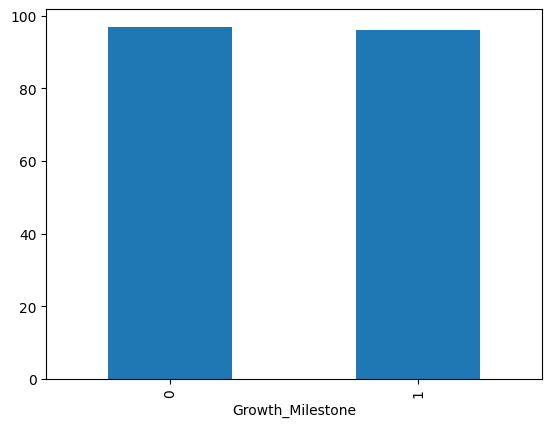

In [34]:
# visualzing bar plot
df['Growth_Milestone'].value_counts().plot(kind='bar')

<Axes: xlabel='Growth_Milestone'>

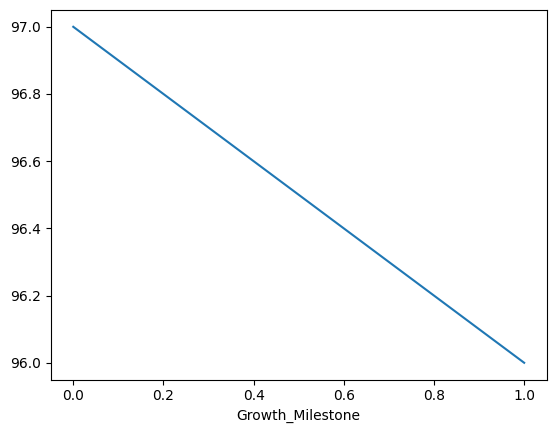

In [35]:
# using line plot
df['Growth_Milestone'].value_counts().plot(kind='line')

<Axes: ylabel='Frequency'>

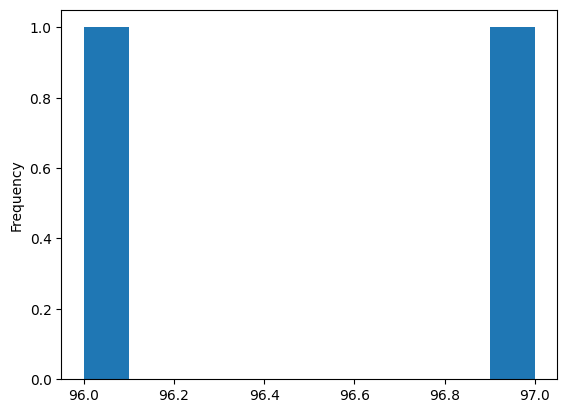

In [36]:
# plotting a histogram 
df['Growth_Milestone'].value_counts().plot(kind='hist')

<Axes: xlabel='Sunlight_Hours', ylabel='Temperature'>

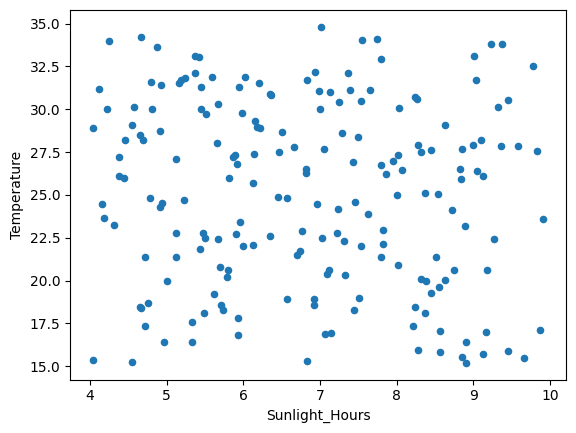

In [37]:
# scatter plot
df.plot(kind='scatter',x='Sunlight_Hours',y='Temperature')

<Axes: xlabel='Humidity', ylabel='Temperature'>

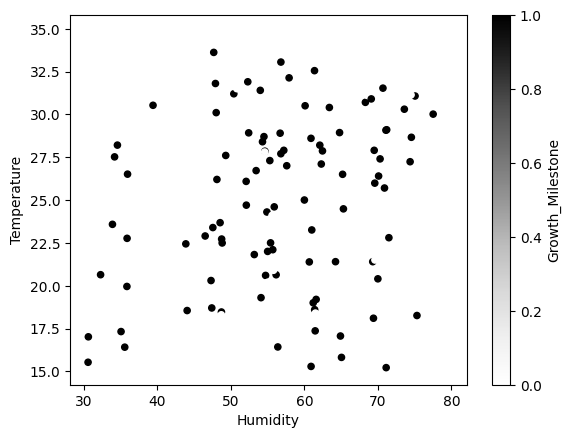

In [38]:
# more complex plot
df.plot(kind='scatter',x='Humidity',y='Temperature',c='Growth_Milestone')